## AIM:- Building a time series model with this data, the primary aim would be to analyze for next 12 or 24 months(1 or 2 years)1961 and 1961 and make future predictions of passenger counts

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [22]:
df=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\Time Series Data\AirPassengers.csv")

In [23]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
df.shape

(144, 2)

In [25]:
df.tail()# last 

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [27]:
#Converting to date time format because it is in object 
df.Month=pd.to_datetime(df.Month)

In [28]:
df=df.set_index(["Month"])#-------------------- making month as index

In [29]:
df.shape

(144, 1)

In [30]:
df.head

<bound method NDFrame.head of             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]>

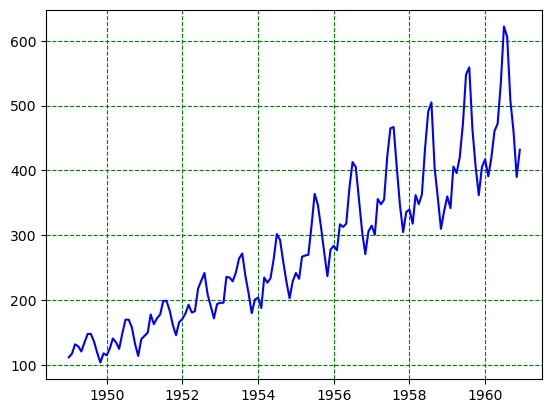

In [31]:
plt.plot(df,color="blue")
plt.grid(color="green",linestyle="--") 

In [33]:
    df.Passengers.diff()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passengers, Length: 144, dtype: float64

In [34]:
# 1949-02-01     6.0 # menas - in index 0 and 1
# 1949-03-01    14.0

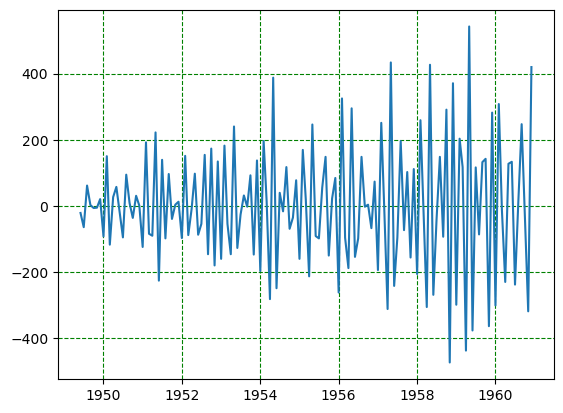

In [35]:
plt.plot(df.Passengers.diff().diff().diff().diff().diff())
plt.grid(color="green",linestyle="--") 

In [38]:
df_log=np.log(df)

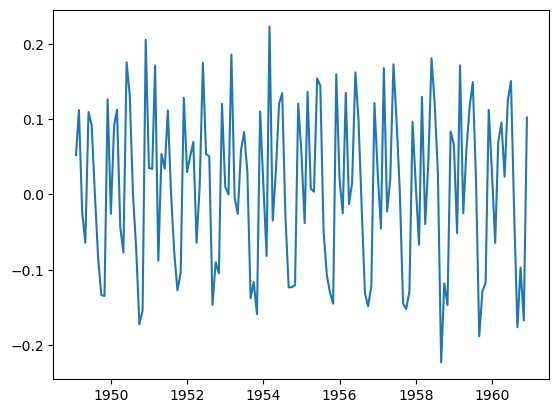

In [39]:
plt.plot(df_log.diff())

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

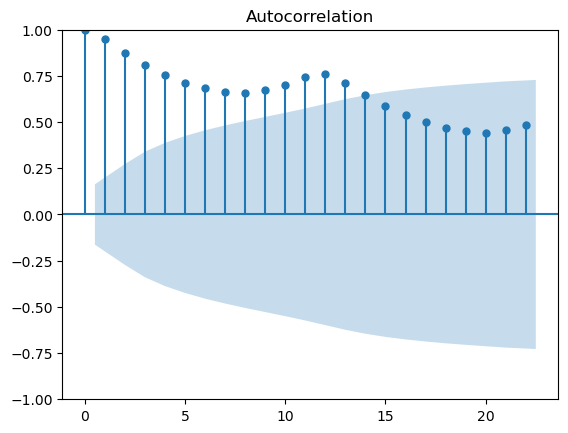

In [41]:
plot_acf(df);# not suefull diagram

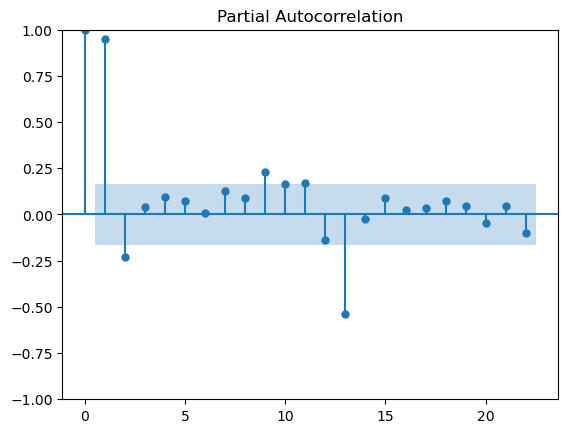

In [42]:
plot_pacf(df);

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#model=ARIMA(df_log,order=(2,1,0))

In [43]:
#pip install pmdarima
from pmdarima import auto_arima

In [44]:
auto_arima(df_log,seasonal=True,m= 12) #12= month
# any value from arima we have to pass the same value in sarima

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# passsing the values form AARIMA 

In [46]:
model1 = SARIMAX(df_log["Passengers"],order=(2,0,0),seasonal_order=(0,1,1,12))

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
result = model1.fit()

In [49]:
pred_df=result.predict(start=144,end=167)# predcting upcomming 2 years

In [50]:
pred_df

1961-01-01    6.103771
1961-02-01    6.045692
1961-03-01    6.162324
1961-04-01    6.188737
1961-05-01    6.220733
1961-06-01    6.355631
1961-07-01    6.492935
1961-08-01    6.487255
1961-09-01    6.307737
1961-10-01    6.190848
1961-11-01    6.044041
1961-12-01    6.147325
1962-01-01    6.181671
1962-02-01    6.123277
1962-03-01    6.239366
1962-04-01    6.265317
1962-05-01    6.296827
1962-06-01    6.431251
1962-07-01    6.568082
1962-08-01    6.561933
1962-09-01    6.381948
1962-10-01    6.264594
1962-11-01    6.117327
1962-12-01    6.220152
Freq: MS, Name: predicted_mean, dtype: float64

In [51]:
# doing antilog
pred_df_oring=np.round(np.exp(pred_df))

In [52]:
pred_df_oring

1961-01-01    448.0
1961-02-01    422.0
1961-03-01    475.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    660.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    467.0
1962-01-01    484.0
1962-02-01    456.0
1962-03-01    513.0
1962-04-01    526.0
1962-05-01    543.0
1962-06-01    621.0
1962-07-01    712.0
1962-08-01    708.0
1962-09-01    591.0
1962-10-01    526.0
1962-11-01    454.0
1962-12-01    503.0
Freq: MS, Name: predicted_mean, dtype: float64

In [53]:
# today was dec 1960 forcast for 61 and 62


In [54]:
pred_df_oring=pd.DataFrame(pred_df_oring)

pred_df_oring.columns=["Predicted"]
pred_df_oring.head(2)

,Predicted
1961-01-01,448.0
1961-02-01,422.0


In [55]:
# ploting 1949 to 1960
# 1961 to 1962

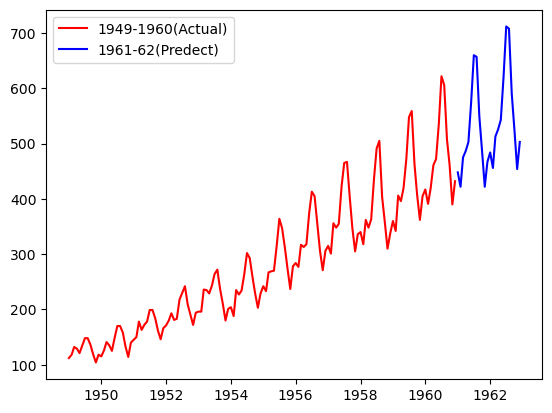

In [113]:
plt.plot(df.Passengers,color="red",label="1949-1960(Actual)")
plt.plot(pred_df_oring.Predicted,color="blue",label="1961-62(Predect)")
plt.legend()

In [100]:
df_log=np.log(df)

In [101]:
df_log_train=df_log.iloc[0:132]# 1st 11 years
df_log_test=df_log.iloc[132:144]

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [103]:
model1 = SARIMAX(df_log["Passengers"],order=(2,0,0),seasonal_order=(0,1,1,12))

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [104]:
result1 = model1.fit()

In [105]:
pred_result=np.round(np.exp(result1.predict(start=132,end=143)))

In [106]:
pred_result=pd.DataFrame(pred_result)
pred_result.columns=["Predicted"]

In [107]:
pred_actual = pd.DataFrame()
pred_actual["Actual"]= df.Passengers[132::]
pred_actual["Predicted"]=pred_result.Predicted
pred_actual

,Actual,Predicted
Month,,
1960-01-01,417,420.0
1960-02-01,391,397.0
1960-03-01,419,459.0
1960-04-01,461,420.0
1960-05-01,472,460.0
1960-06-01,535,548.0
1960-07-01,622,611.0
1960-08-01,606,624.0
1960-09-01,508,512.0


In [108]:
pred_actual["error"]= pred_actual['Actual']-pred_actual["Predicted"]

In [109]:
MAPE=np.mean(np.abs(pred_actual["error"]*100/pred_actual['Actual']))
MAPE

3.23732129709901

In [110]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(pred_actual['Actual'],pred_actual["Predicted"])*100

3.23732129709901

In [111]:
acc=100-MAPE
acc

96.76267870290098

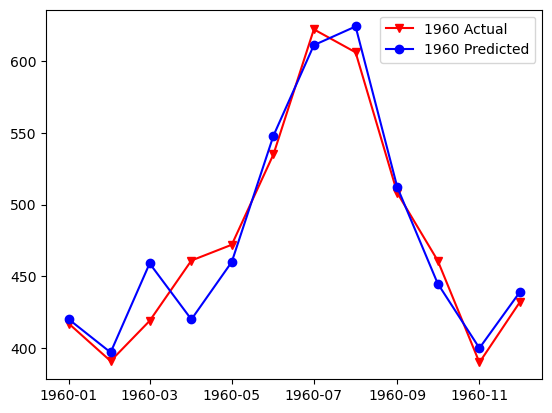

In [115]:
plt.plot(pred_actual["Actual"],color="red",label="1960 Actual",marker="v")
plt.plot(pred_actual["Predicted"],color="blue",label="1960 Predicted",marker="o")
plt.legend()